In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import statsmodels as sm

In [28]:
# Density scaling 
S95_08 = np.loadtxt("PLA08_lat_95_1.csv", skiprows=1, delimiter=",")
S95_10 = np.loadtxt("PLA08_lat_95_2.csv", skiprows=1, delimiter=",")
S95_12 = np.loadtxt("PLA08_lat_95_3.csv", skiprows=1, delimiter=",")
S95_14 = np.loadtxt("PLA08_lat_95_4.csv", skiprows=1, delimiter=",")
G95_D160 = np.loadtxt("PLA08_95_D160.csv", skiprows=1, delimiter=",")


G95_D180 = np.loadtxt("PLA08_G95_D180.csv", skiprows=1, delimiter=",")
G95_D190 = np.loadtxt("PLA08_G95_D190.csv", skiprows=1, delimiter=",")
G95_D200 = np.loadtxt("PLA8_95_D200.csv", skiprows=1, delimiter=",")

#Geometry scaling 
S75_10 = np.loadtxt("PLA8_lat_75_1.csv", skiprows=1, delimiter=",")
S95_10 = np.loadtxt("PLA08_lat_95_2.csv", skiprows=1, delimiter=",")

G115_D100 = np.loadtxt("PLA08_115_D100.csv", skiprows=1, delimiter=",")
G130_D100 = np.loadtxt("PLA8_130_D100.csv", skiprows=1, delimiter=",")
S135_10 = np.loadtxt("PLA8_lat_135_3.csv", skiprows=1, delimiter=",")
G140_D100 = np.loadtxt("PLA8_140_D100.csv", skiprows=1, delimiter=",")
G150_D100 = np.loadtxt("PLA08_G150.csv", skiprows=1, delimiter=",")
G155_D100 =np.loadtxt("PLA08_G155.csv", skiprows=1, delimiter=",")
G160_D100 = np.loadtxt("PLA08_G160.csv", skiprows=1, delimiter=",")

In [30]:
#Density
S95_08_load, S95_08_ext = S95_08[:,1], S95_08[:,2]
S95_10_load, S95_10_ext = S95_10[:,1], S95_10[:,2]
S95_12_load, S95_12_ext = S95_12[:,1], S95_12[:,2]
S95_14_load, S95_14_ext = S95_14[:,1], S95_14[:,2]
G95_D160_load, G95_D160_ext  = G95_D160[:,1], G95_D160[:,2]

G95_D180_load, G95_D180_ext = G95_D180[:,1], G95_D180[:,2]
G95_D190_load, G95_D190_ext = G95_D190[:,1], G95_D190[:,2]
G95_D200_load, G95_D200_ext = G95_D200[:,1], G95_D200[:,2]

#Geometry
S75_10_load, S75_10_ext = S75_10[:,1], S75_10[:,2]
S95_10_load, S95_10_ext = S95_10[:,1], S95_10[:,2]
G115_D100_load, G115_D100_ext = G115_D100[:,1], G115_D100[:,2]

G130_D100_load, G130_D100_ext = G130_D100[:,1], G130_D100[:,2]
S135_10_load, S135_10_ext = S135_10[:,1], S135_10[:,2]
G140_D100_load, G140_D100_ext = G140_D100[:,1], G140_D100[:,2]
G150_D100_load, G150_D100_ext  = G150_D100[:,1], G150_D100[:,2]
G155_D100_load, G155_D100_ext  = G155_D100[:,1], G155_D100[:,2]
G160_D100_load, G160_D100_ext  = G160_D100[:,1], G160_D100[:,2]


In [7]:
def stiffness_func(displacement, force, start_percentage, stop_percentage):
    max_force_index = np.argmax(force)
    max_displacement = displacement[max_force_index]
    max_force = force[max_force_index]

    start_index = int(start_percentage * max_force_index)
    stop_index = int(stop_percentage * max_force_index)

    displacement_range = displacement[start_index:stop_index]
    force_range = force[start_index:stop_index]

    def linear_fit(x, k, a):
        return k * x + a 

    params, covariance = curve_fit(linear_fit, displacement_range, force_range)

    predicted_force = linear_fit(displacement_range, *params)

    residuals = force_range - predicted_force
    ss_residual = np.sum(residuals**2)
    ss_total = np.sum((force_range - np.mean(force_range))**2)
    r_squared = 1 - (ss_residual / ss_total)
    
    plt.figure()
    plt.plot(displacement, force, linestyle='-', label='Force-Displacement Curve')
    plt.plot(displacement_range, linear_fit(displacement_range, *params), linestyle='-', color='r', label='Linear Fit')
    plt.scatter(max_displacement, max_force, color='red', label='Maximum force')
    plt.xlabel("Displacement [mm]")
    plt.ylabel("Force [N]")
    plt.title("Force-Displacement Curve")
    plt.grid()
    plt.legend()
    plt.show()
    
    print("R-squared value:", r_squared)
    
    stiffness = params[0]

    return stiffness, max_force

In [24]:
def energy_func(force, displacement):
    # Find the index corresponding to the maximum force
    max_force_index = np.argmax(force)

    energy_up_to_max_force = np.trapz(force[:max_force_index], displacement[:max_force_index])

    return energy_up_to_max_force

# Density scaling - G95

In [ ]:
loads = [S95_08_load[:12500], S95_10_load[:11500], S95_12_load[:12501], S95_14_load[:12501],
         G95_D160_load[:12000], G95_D180_load[:12000], G95_D190_load[:12000], G95_D200_load[:12000],]

displ = [S95_08_ext[:12500], S95_10_ext[:11500], S95_12_ext[:12501], S95_14_ext[:12501],
         G95_D160_ext[:12000], G95_D180_ext[:12000], G95_D190_ext[:12000], G95_D200_ext[:12000],]

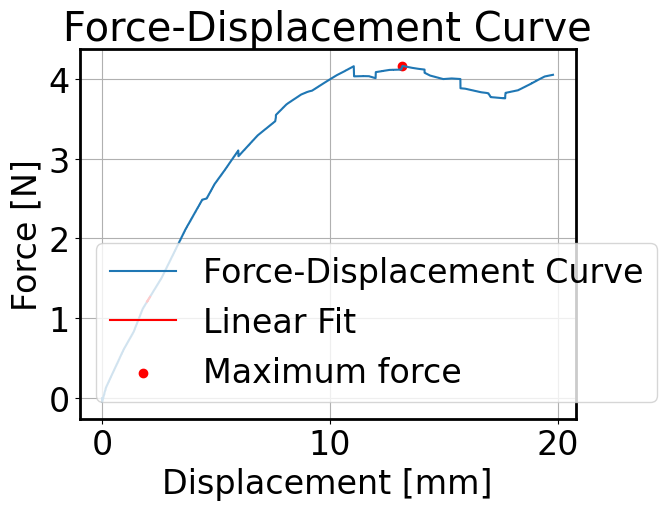

R-squared value: 0.9933135887100272


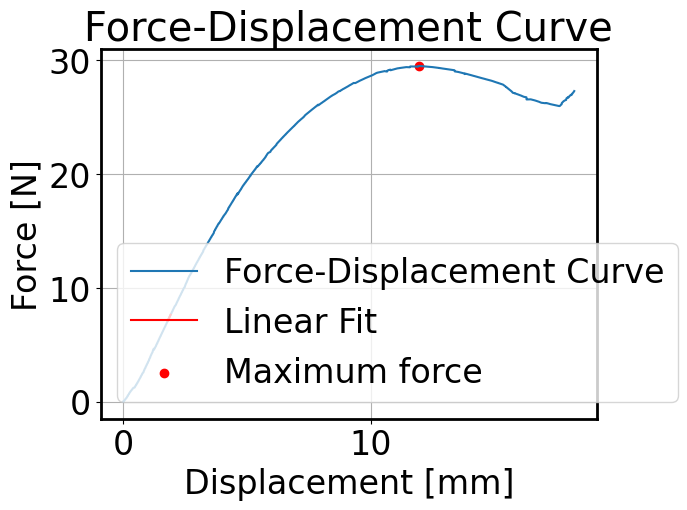

R-squared value: 0.9920152832418806


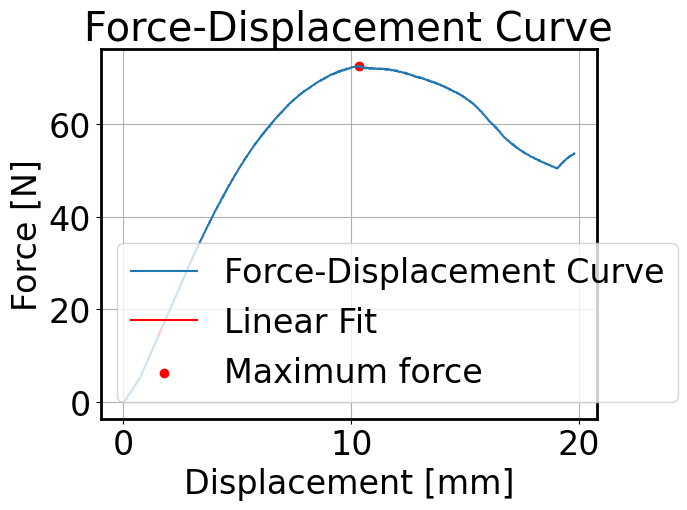

R-squared value: 0.9895485448988315


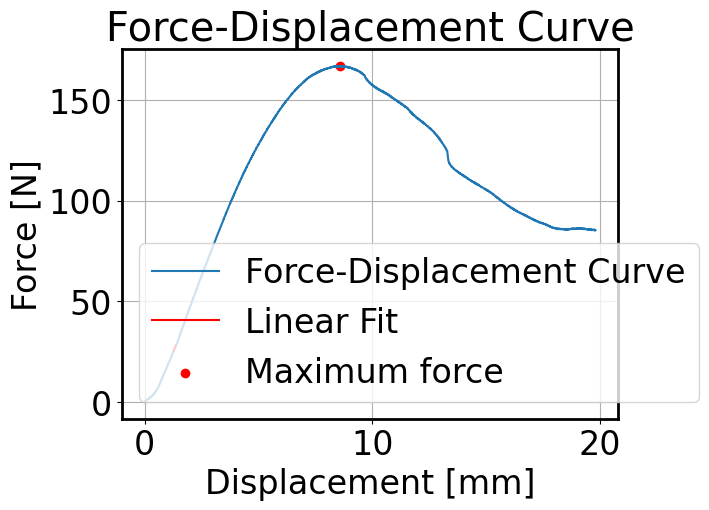

R-squared value: 0.992359463525459


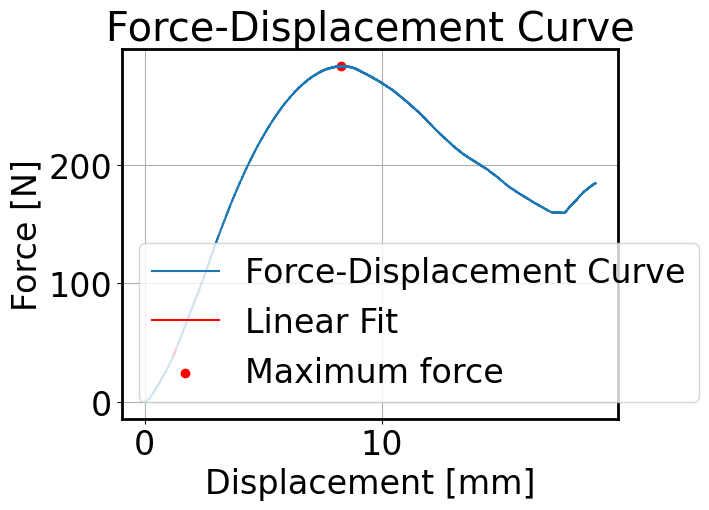

R-squared value: 0.9931959381861211


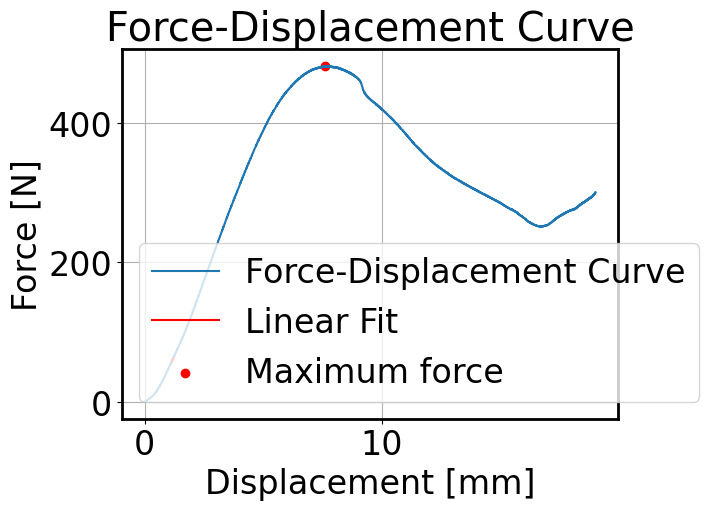

R-squared value: 0.9883923218758428


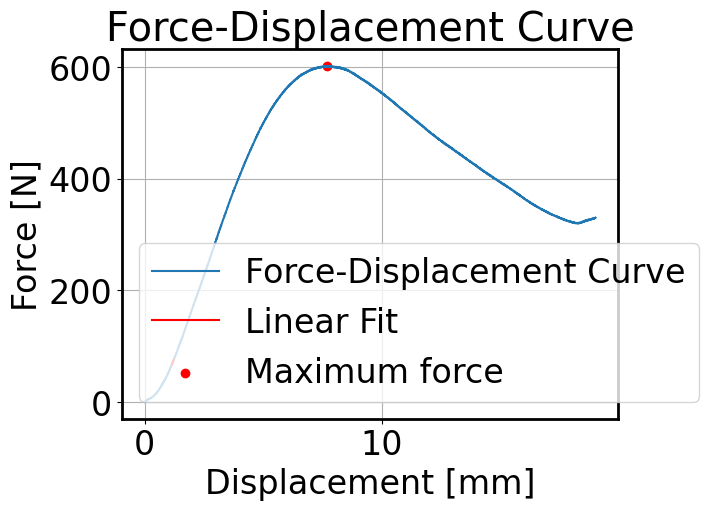

R-squared value: 0.9918750787214988


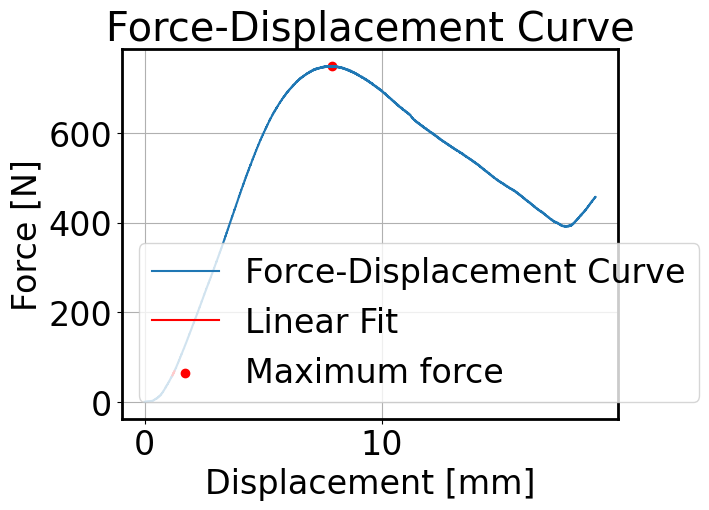

R-squared value: 0.997095750771868


In [25]:
def make_lists(force, displacement, start, stop, stiffness_m, strength_m):
    stiffness, max_force = stiffness_func(force, displacement, start, stop)
    stiffness_m.append(stiffness)
    strength_m.append(max_force)

k_all = []
strength = []


for i in range(len(loads)):
    make_lists(displ[i], loads[i], 0.15, 0.16, k_all, strength)


energy_f_max = []

for i in range(len(loads)):
    e_max = energy_func(loads[i], displ[i])
    energy_f_max.append(e_max)

In [26]:
densities =  [0.025, 0.038, 0.055, 0.075, .098, 0.124, 0.138, 0.153]

In [18]:
import statsmodels.api as sm
plt.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 24})

In [17]:
def power_law_func(x, a, b):
    return a*x**b

#### Stiffness

Fitted parameters: a = 13247.875614827075, b = 2.4058480869742853


C:\Users\Bruker\AppData\Local\Temp\ipykernel_19600\1468960866.py:15: RuntimeWarning: divide by zero encountered in log
  x_pred_sm = sm.add_constant(np.log(x_pred))
c:\Users\Bruker\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


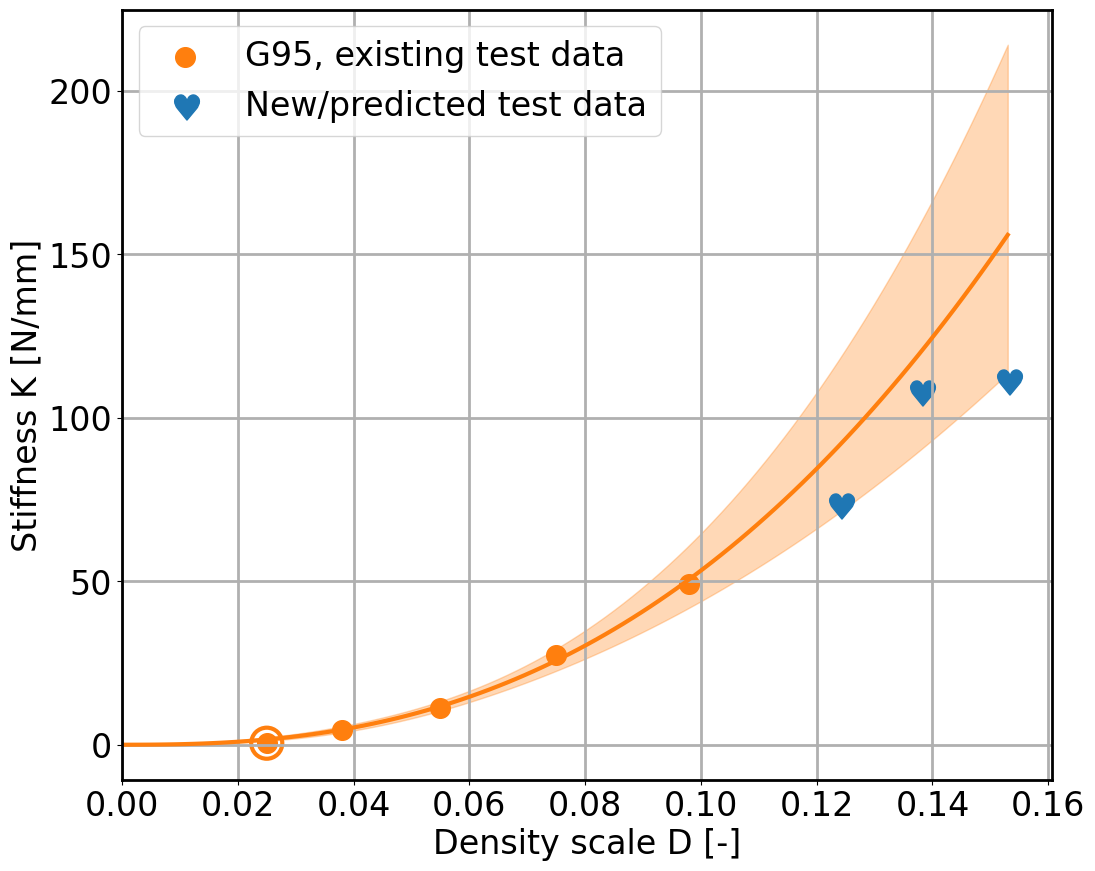

In [19]:
x_data = np.array(densities[1:5])
y_data = np.array(k_all[1:5])
params, params_covariance = curve_fit(power_law_func, x_data, y_data, p0=[1, 1])

# Get the fitted parameters
a, b = params
print(f'Fitted parameters: a = {a}, b = {b}')

# Using statsmodels to get the prediction and confidence intervals
x_data_sm = sm.add_constant(np.log(x_data))  # Add constant for intercept
model = sm.OLS(np.log(y_data), x_data_sm).fit()

# New x values for prediction
x_pred = np.linspace(0, densities[-1], 100)
x_pred_sm = sm.add_constant(np.log(x_pred))

# Get the prediction and confidence intervals
predictions = model.get_prediction(x_pred_sm)
pred_summary_frame = predictions.summary_frame(alpha=0.05)

# Extract the predictions and intervals
y_pred = np.exp(pred_summary_frame['mean'])
y_lower = np.exp(pred_summary_frame['mean_ci_lower'])
y_upper = np.exp(pred_summary_frame['mean_ci_upper'])

# Plotting the data and the fit with confidence intervals
plt.figure(figsize=(12, 10))
plt.scatter(densities[0], k_all[0], c="C1", s=200)
plt.scatter(densities[0], k_all[0], edgecolor="C1", s=500, facecolor="None", linewidth=3)

plt.scatter(x_data, y_data, c="C1", label="G95, existing test data", s=200)

plt.plot(x_pred, y_pred, color="C1",  linewidth=3)
plt.fill_between(x_pred, y_lower, y_upper, color="C1", alpha=0.3, )
plt.scatter(densities[5:], k_all[5:], c = "C10", s=400, marker='${}$'.format('\u2665'), label="New/predicted test data")
plt.xlim(0)
plt.xlabel('Density scale D [-]')
plt.ylabel('Stiffness K [N/mm]')
plt.legend(loc = "upper left")
plt.grid(linewidth=2)
plt.show()

### Strength

Fitted parameters: a = 53319.7504387522, b = 2.249318658245095


C:\Users\Bruker\AppData\Local\Temp\ipykernel_19600\835204283.py:15: RuntimeWarning: divide by zero encountered in log
  x_pred_sm = sm.add_constant(np.log(x_pred))
c:\Users\Bruker\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


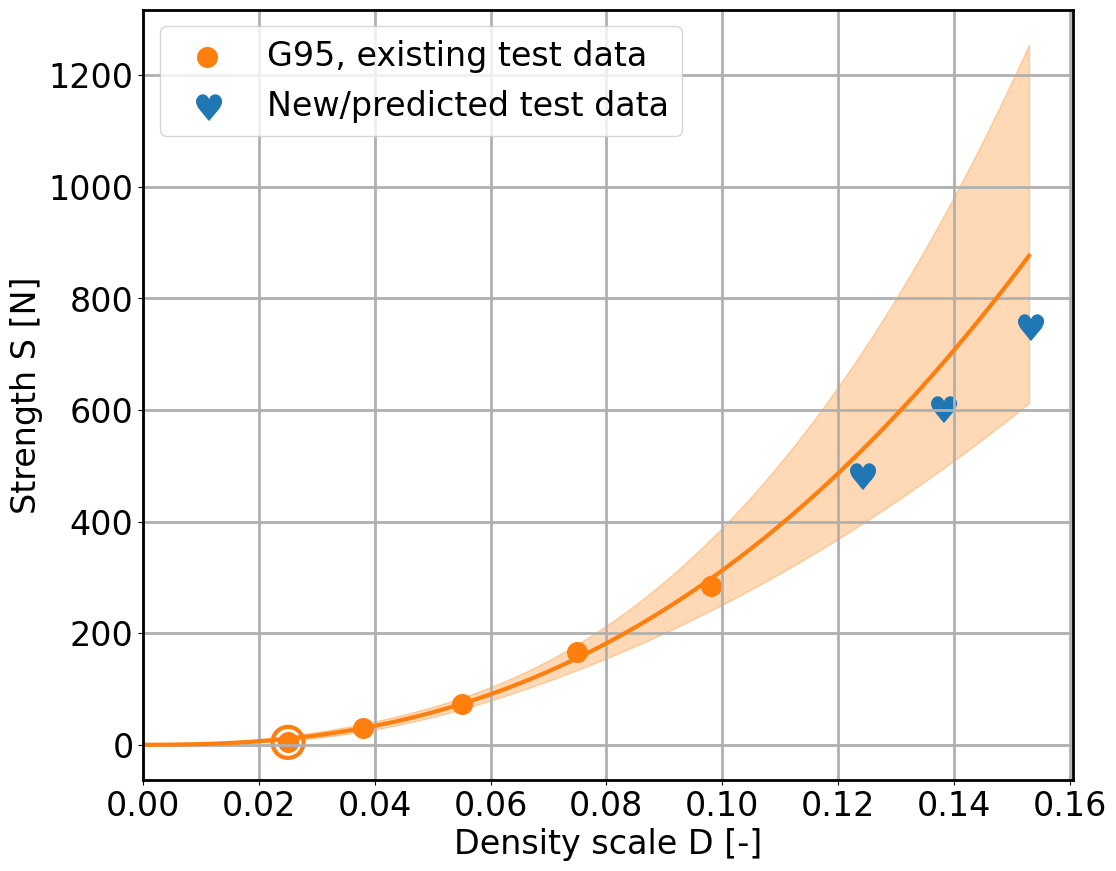

In [20]:
x_data = np.array(densities[1:5])
y_data = np.array(strength[1:5])

params, params_covariance = curve_fit(power_law_func, x_data, y_data, p0=[1, 1])

a, b = params
print(f'Fitted parameters: a = {a}, b = {b}')

# Using statsmodels to get the prediction and confidence intervals
x_data_sm = sm.add_constant(np.log(x_data))  # Add constant for intercept
model = sm.OLS(np.log(y_data), x_data_sm).fit()

# New x values for prediction
x_pred = np.linspace(0, densities[-1], 100)
x_pred_sm = sm.add_constant(np.log(x_pred))

# Get the prediction and confidence intervals
predictions = model.get_prediction(x_pred_sm)
pred_summary_frame = predictions.summary_frame(alpha=0.05)

# Extract the predictions and intervals
y_pred = np.exp(pred_summary_frame['mean'])
y_lower = np.exp(pred_summary_frame['mean_ci_lower'])
y_upper = np.exp(pred_summary_frame['mean_ci_upper'])

# Plotting the data and the fit with confidence intervals
plt.figure(figsize=(12, 10))

plt.scatter(densities[0], strength[0], c="C1", s=200)
plt.scatter(densities[0], strength[0], edgecolor="C1", s=500, facecolor="None", linewidth=3)
plt.scatter(x_data, y_data, c="C1", label="G95, existing test data", s=200)

plt.plot(x_pred, y_pred, color="C1",  linewidth=3)
plt.fill_between(x_pred, y_lower, y_upper, color="C1", alpha=0.3, )
plt.scatter(densities[5:], strength[5:], c = "C10", s=400, marker='${}$'.format('\u2665'), label="New/predicted test data")
plt.xlim(0)
plt.xlabel('Density scale D [-]')
plt.ylabel('Strength S [N]')
plt.legend(loc = "upper left")
plt.grid(linewidth=2)
plt.show()

### Toughness

Fitted parameters: a = 109103.25787119586, b = 1.875870620837457


C:\Users\Bruker\AppData\Local\Temp\ipykernel_19600\124521669.py:15: RuntimeWarning: divide by zero encountered in log
  x_pred_sm = sm.add_constant(np.log(x_pred))
c:\Users\Bruker\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


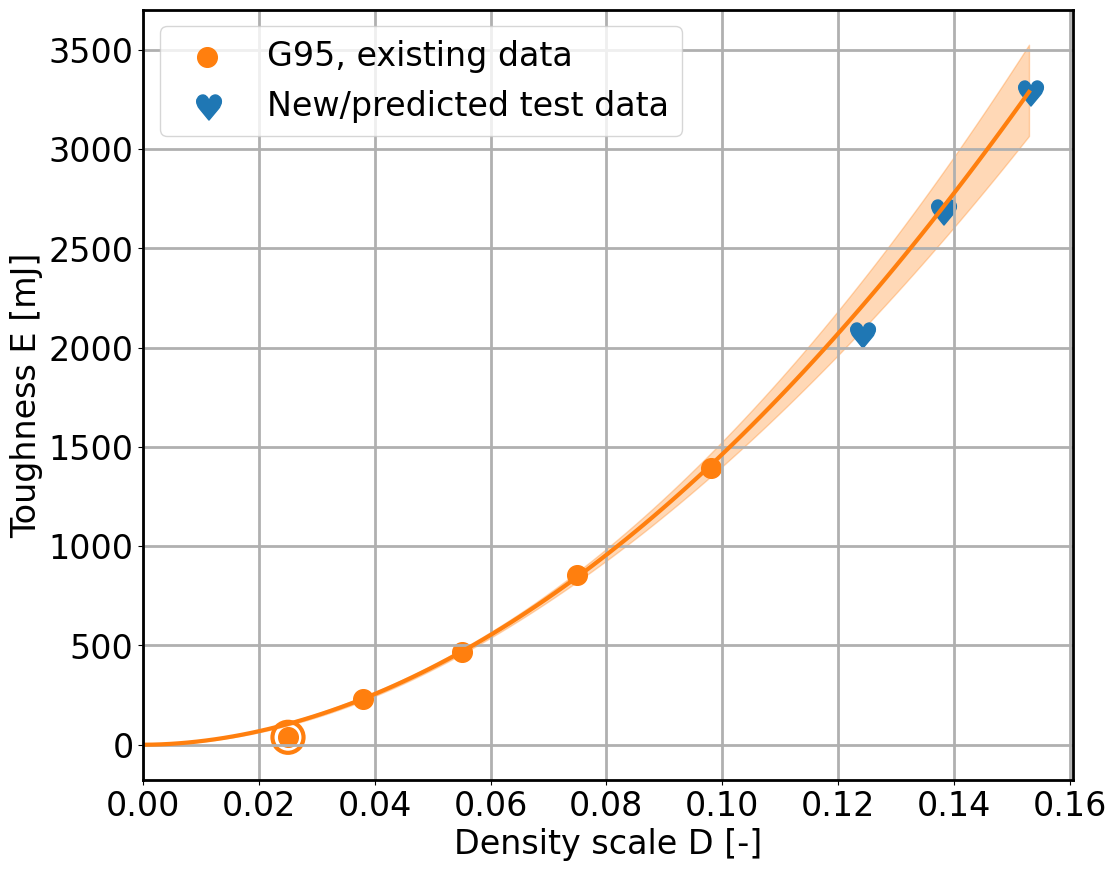

In [27]:
x_data = np.array(densities[1:5])
y_data = np.array(energy_f_max[1:5])

params, params_covariance = curve_fit(power_law_func, x_data, y_data, p0=[1, 1])

a, b = params
print(f'Fitted parameters: a = {a}, b = {b}')

# Using statsmodels to get the prediction and confidence intervals
x_data_sm = sm.add_constant(np.log(x_data))  # Add constant for intercept
model = sm.OLS(np.log(y_data), x_data_sm).fit()

# New x values for prediction
x_pred = np.linspace(0, densities[-1], 100)
x_pred_sm = sm.add_constant(np.log(x_pred))

# Get the prediction and confidence intervals
predictions = model.get_prediction(x_pred_sm)
pred_summary_frame = predictions.summary_frame(alpha=0.05)

# Extract the predictions and intervals
y_pred = np.exp(pred_summary_frame['mean'])
y_lower = np.exp(pred_summary_frame['mean_ci_lower'])
y_upper = np.exp(pred_summary_frame['mean_ci_upper'])

# Plotting the data and the fit with confidence intervals
plt.figure(figsize=(12, 10))

plt.scatter(densities[0], energy_f_max[0], c="C1", s=200)
plt.scatter(densities[0], energy_f_max[0], edgecolor="C1", s=500, facecolor="None", linewidth=3)
plt.scatter(x_data, y_data, c="C1", label="G95, existing data", s=200)

plt.plot(x_pred, y_pred, color="C1",  linewidth=3)
plt.fill_between(x_pred, y_lower, y_upper, color="C1", alpha=0.3, )
plt.scatter(densities[5:], energy_f_max[5:], c = "C10", s=400, marker='${}$'.format('\u2665'), label="New/predicted test data")
plt.xlim(0)
plt.xlabel('Density scale D [-]')
plt.ylabel('Toughness E [mJ]')
plt.legend(loc = "upper left")
plt.grid(linewidth=2)
plt.show()

# Geometry scaling - D.038

In [32]:
geometries = [75, 95, 115, 130, 135, 140, 150, 155, 160]

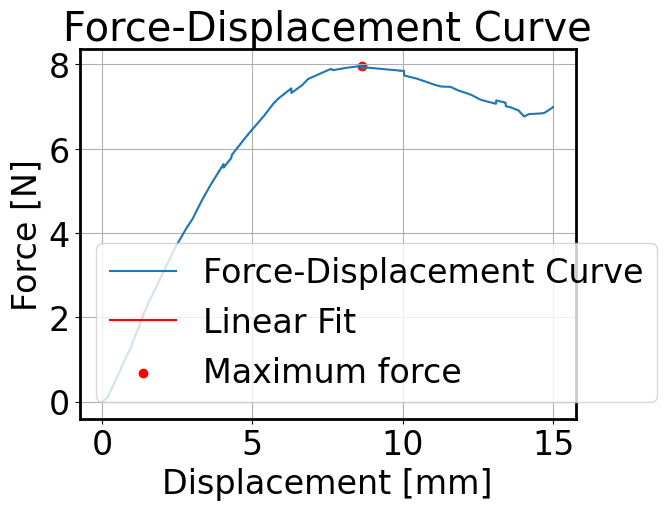

R-squared value: 0.9871901889882821


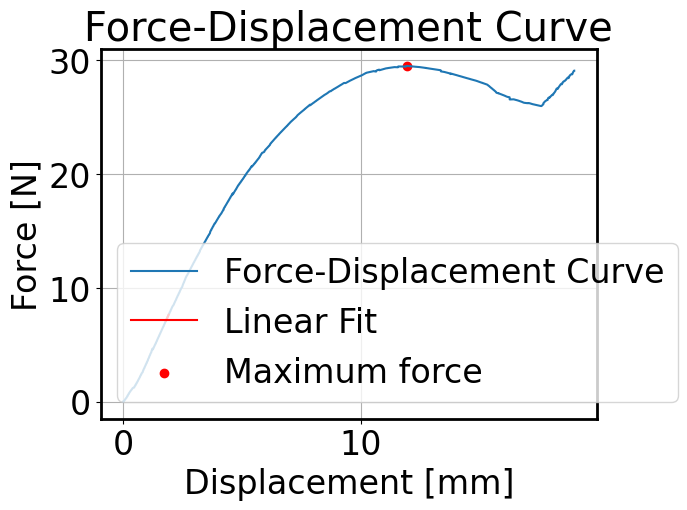

R-squared value: 0.9920152832418806


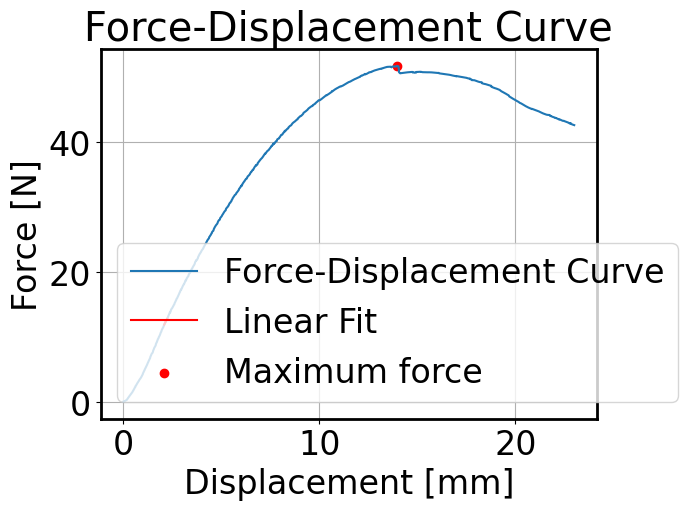

R-squared value: 0.9830553597075437


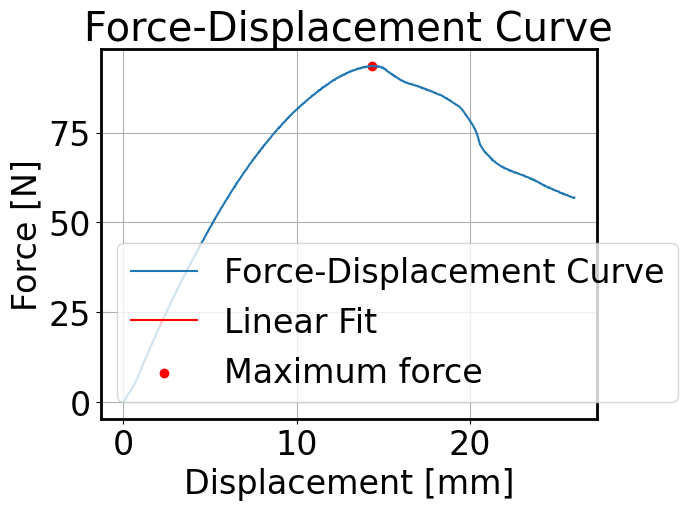

R-squared value: 0.9939221538250732


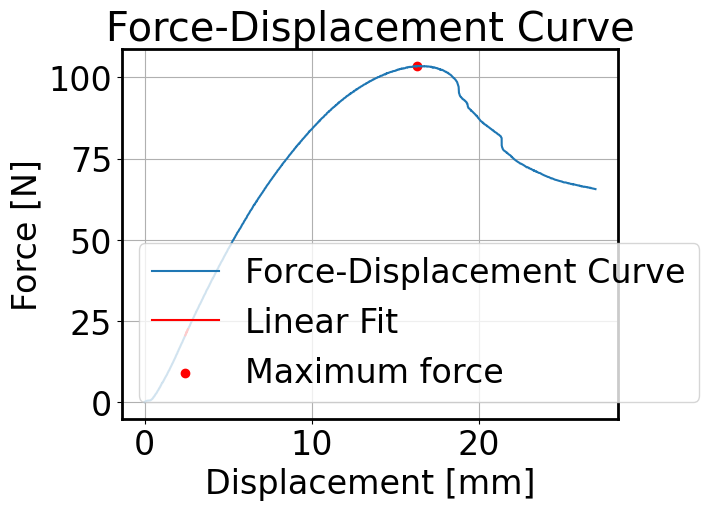

R-squared value: 0.9972847901184916


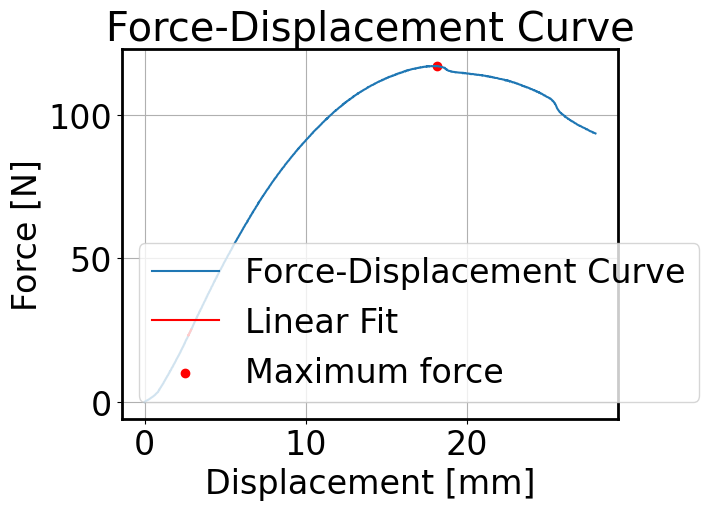

R-squared value: 0.9947355447337822


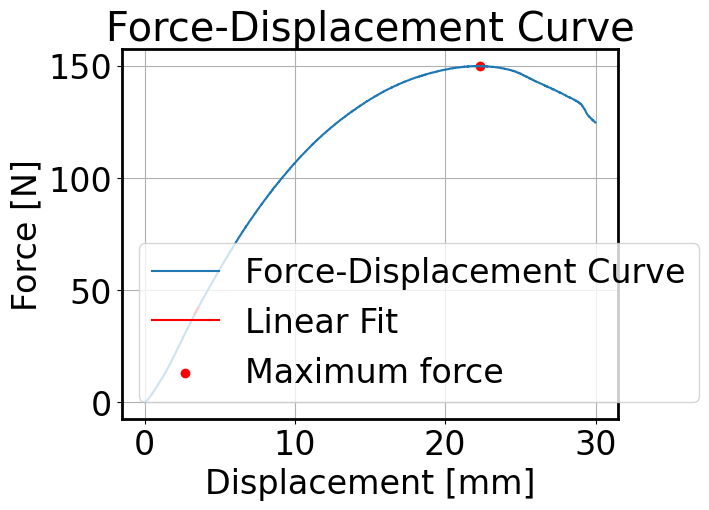

R-squared value: 0.9949819461420801


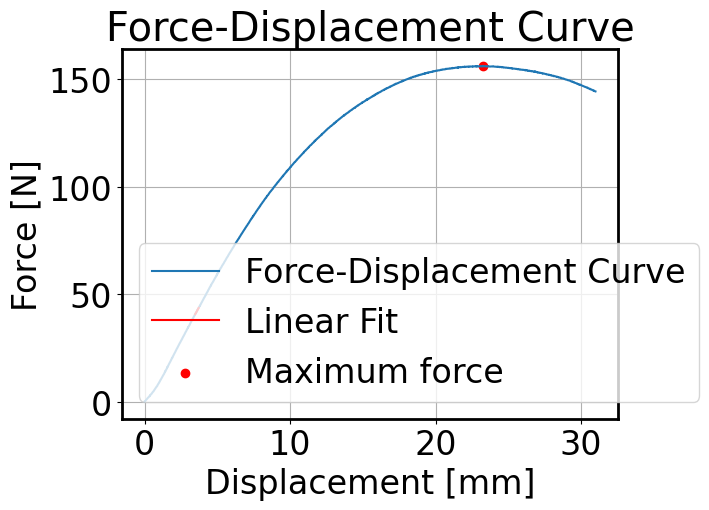

R-squared value: 0.9978851813463013


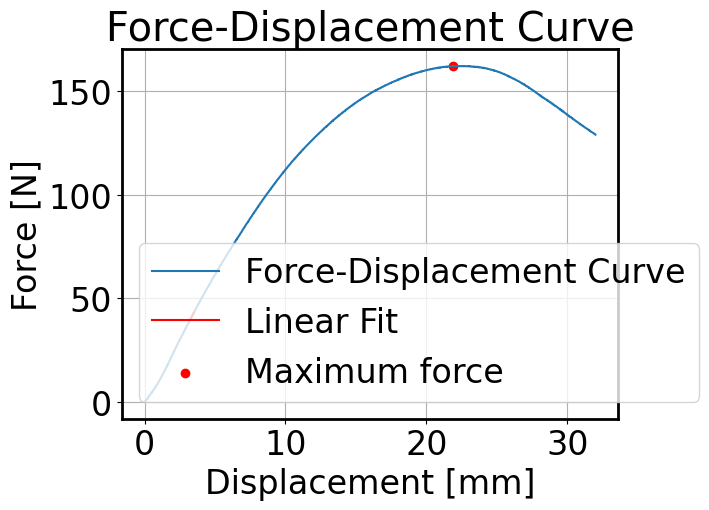

R-squared value: 0.9984679002772457


In [31]:
loads2 = [S75_10_load[:12000], S95_10_load[:12000], G115_D100_load[:12000], G130_D100_load[:12000], S135_10_load[:12000],
          G140_D100_load[:12000], G150_D100_load[:12000],G155_D100_load[:12000],G160_D100_load[:12000],]

ext2 = [S75_10_ext[:12000], S95_10_ext[:12000], G115_D100_ext[:12000],G130_D100_ext[:12000],S135_10_ext[:12000],G140_D100_ext[:12000],
         G150_D100_ext[:12000],G155_D100_ext[:12000],G160_D100_ext[:12000],]

k_all2 = []
strength2 = []

for i in range(len(loads2)):
    make_lists(ext2[i], loads2[i], 0.15, 0.16, k_all2, strength2)

energy_f_max2 = []

for i in range(len(loads2)):
    e_max = energy_func(loads2[i], ext2[i])
    energy_f_max2.append(e_max)

### Stiffness

Fitted parameters: a = 3.1483452316860533e-06, b = 3.080954348287576


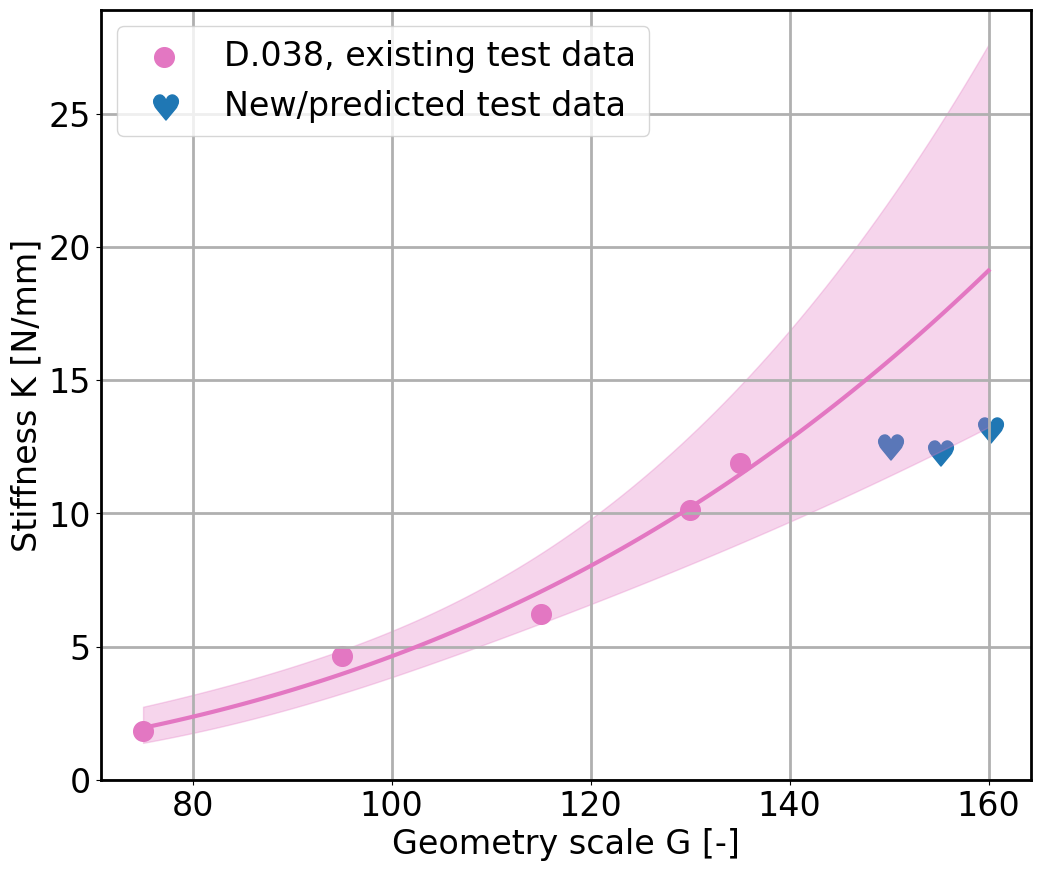

In [34]:
x_data = np.array(geometries[0:5])
y_data = np.array(k_all2[0:5])

# Perform the curve fitting
params, params_covariance = curve_fit(power_law_func, x_data, y_data, p0=[1, 1])

# Get the fitted parameters
a, b = params
print(f'Fitted parameters: a = {a}, b = {b}')


# Using statsmodels to get the prediction and confidence intervals
x_data_sm = sm.add_constant(np.log(x_data))  # Add constant for intercept
model = sm.OLS(np.log(y_data), x_data_sm).fit()

# New x values for prediction
x_pred = np.linspace(min(x_data), geometries[-1], 100)
x_pred_sm = sm.add_constant(np.log(x_pred))

# Get the prediction and confidence intervals
predictions = model.get_prediction(x_pred_sm)
pred_summary_frame = predictions.summary_frame(alpha=0.05)

# Extract the predictions and intervals
y_pred = np.exp(pred_summary_frame['mean'])
y_lower = np.exp(pred_summary_frame['mean_ci_lower'])
y_upper = np.exp(pred_summary_frame['mean_ci_upper'])

# Plotting the data and the fit with confidence intervals
plt.figure(figsize=(12, 10))
plt.scatter(x_data, y_data, c="C6", label="D.038, existing test data", s=200)
plt.scatter(geometries[6:], k_all2[6:], c = "C10", s=400, marker='${}$'.format('\u2665'), label="New/predicted test data")
plt.plot(x_pred, y_pred, color="C6",  linewidth=3)
plt.fill_between(x_pred, y_lower, y_upper, color="C6", alpha=0.3, )
plt.ylim(0)
plt.xlabel('Geometry scale G [-]')
plt.ylabel('Stiffness K [N/mm]')
plt.legend(loc = "upper left")
plt.grid(linewidth=2)
plt.show()


### Strength

Fitted parameters: a = 3.2048438259908336e-07, b = 3.9974136467264016


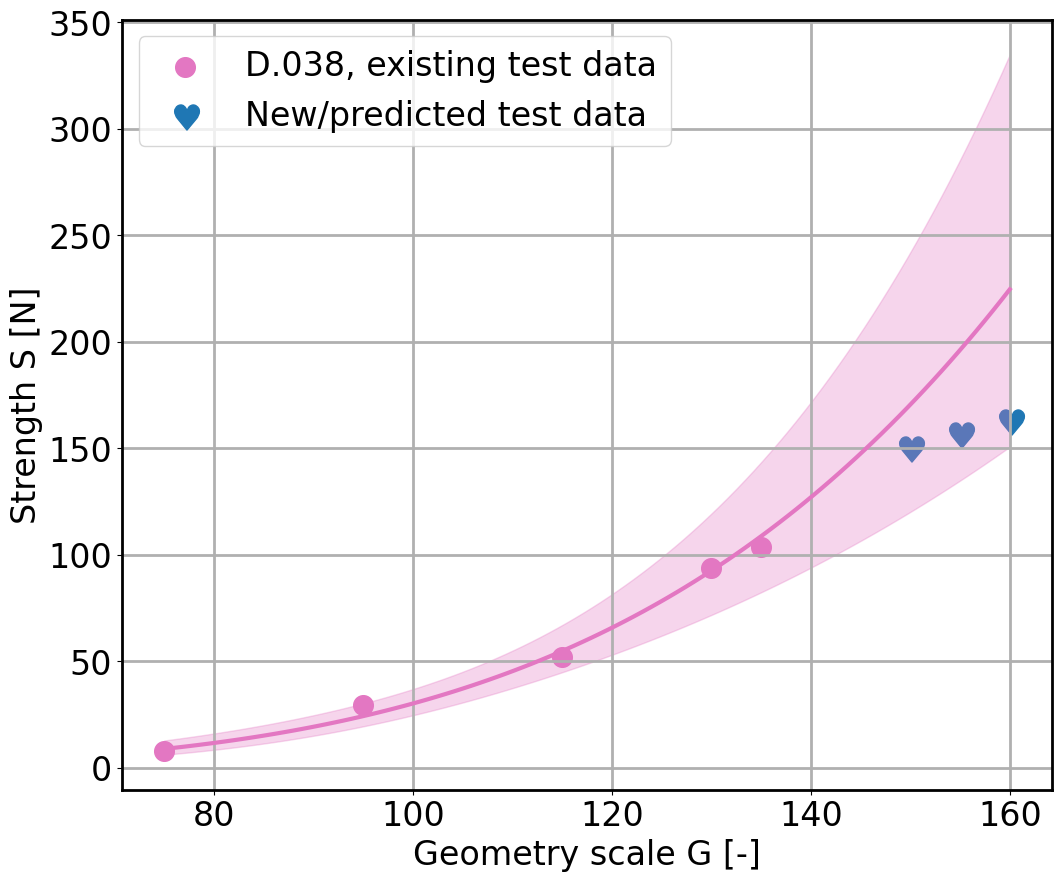

In [35]:
y_data = np.array(strength2[0:5])
# Perform the curve fitting
params, params_covariance = curve_fit(power_law_func, x_data, y_data, p0=[1, 1])

# Get the fitted parameters
a, b = params
print(f'Fitted parameters: a = {a}, b = {b}')


# Using statsmodels to get the prediction and confidence intervals
x_data_sm = sm.add_constant(np.log(x_data))  # Add constant for intercept
model = sm.OLS(np.log(y_data), x_data_sm).fit()

# New x values for prediction
x_pred = np.linspace(min(x_data), geometries[-1], 100)
x_pred_sm = sm.add_constant(np.log(x_pred))

# Get the prediction and confidence intervals
predictions = model.get_prediction(x_pred_sm)
pred_summary_frame = predictions.summary_frame(alpha=0.05)

# Extract the predictions and intervals
y_pred = np.exp(pred_summary_frame['mean'])
y_lower = np.exp(pred_summary_frame['mean_ci_lower'])
y_upper = np.exp(pred_summary_frame['mean_ci_upper'])

# Plotting the data and the fit with confidence intervals
plt.figure(figsize=(12, 10))
plt.scatter(x_data, y_data, c="C6", label="D.038, existing test data", s=200)
plt.scatter(geometries[6:], strength2[6:], c = "C10", s=400, marker='${}$'.format('\u2665'), label="New/predicted test data")
plt.plot(x_pred, y_pred, color="C6",  linewidth=3)
plt.fill_between(x_pred, y_lower, y_upper, color="C6", alpha=0.3, )
plt.xlabel('Geometry scale G [-]')
plt.ylabel('Strength S [N]')
plt.legend(loc = "upper left")
plt.grid(linewidth=2)
plt.show()

### Toughness

Fitted parameters: a = 6.490283121666357e-08, b = 4.788240255701974


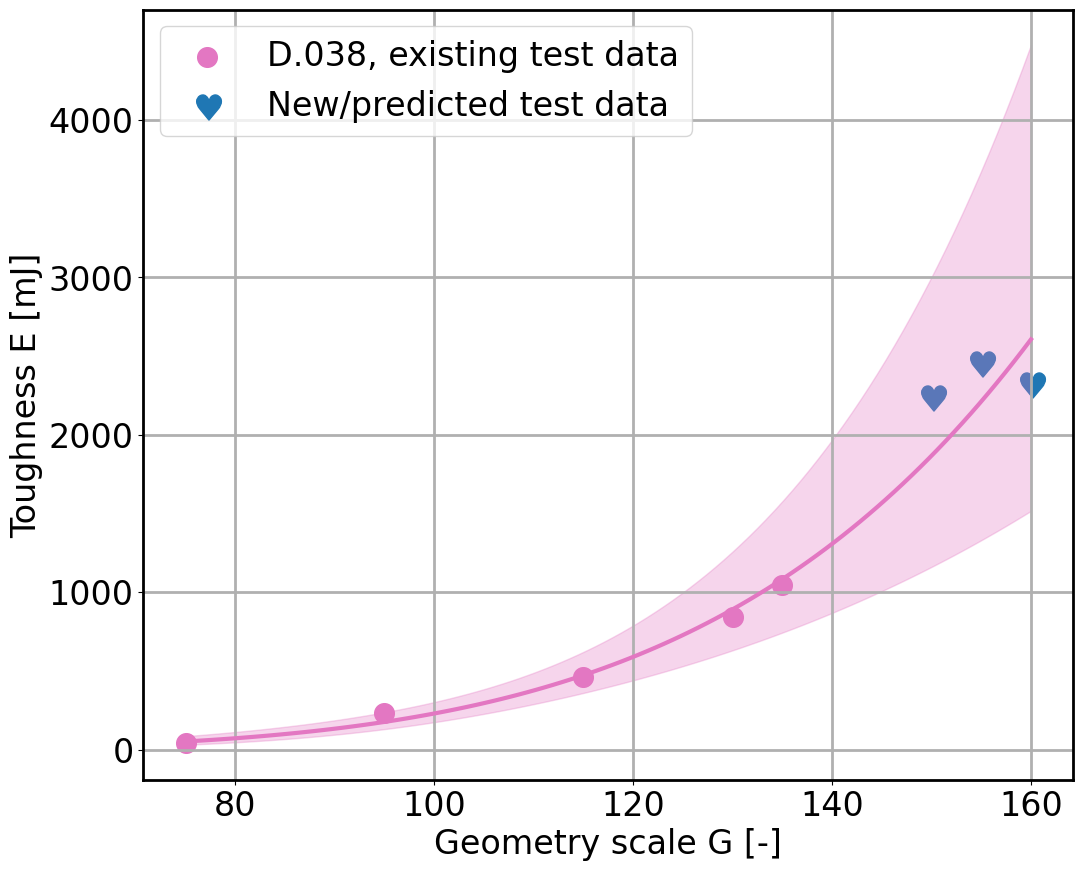

In [38]:
y_data = np.array(energy_f_max2[0:5])
# Perform the curve fitting
params, params_covariance = curve_fit(power_law_func, x_data, y_data, p0=[1, 1])

# Get the fitted parameters
a, b = params
print(f'Fitted parameters: a = {a}, b = {b}')

# Using statsmodels to get the prediction and confidence intervals
x_data_sm = sm.add_constant(np.log(x_data))  # Add constant for intercept
model = sm.OLS(np.log(y_data), x_data_sm).fit()

# New x values for prediction
x_pred = np.linspace(min(x_data), geometries[-1], 100)
x_pred_sm = sm.add_constant(np.log(x_pred))

# Get the prediction and confidence intervals
predictions = model.get_prediction(x_pred_sm)
pred_summary_frame = predictions.summary_frame(alpha=0.05)

# Extract the predictions and intervals
y_pred = np.exp(pred_summary_frame['mean'])
y_lower = np.exp(pred_summary_frame['mean_ci_lower'])
y_upper = np.exp(pred_summary_frame['mean_ci_upper'])

# Plotting the data and the fit with confidence intervals
plt.figure(figsize=(12, 10))
plt.scatter(x_data, y_data, c="C6", label="D.038, existing test data", s=200)
plt.scatter(geometries[6:], energy_f_max2[6:], c = "C10", s=400, marker='${}$'.format('\u2665'), label="New/predicted test data")
plt.plot(x_pred, y_pred, color="C6",  linewidth=3)
plt.fill_between(x_pred, y_lower, y_upper, color="C6", alpha=0.3, )
plt.xlabel('Geometry scale G [-]')
plt.ylabel('Toughness E [mJ]')
plt.legend(loc = "upper left")
plt.grid(linewidth=2)
plt.show()